# Modelling using basic Supervised Learning methods

In [3]:
import pandas as pd
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('Dry_Bean.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

## Pandas Profiling

In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file('pandas_report.html')

In [7]:
df = df.drop_duplicates()

## Visualization

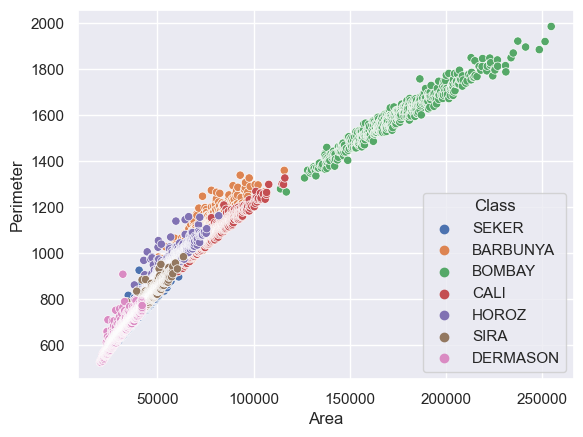

In [8]:
sns.scatterplot(data=df, x='Area', y='Perimeter', hue='Class');

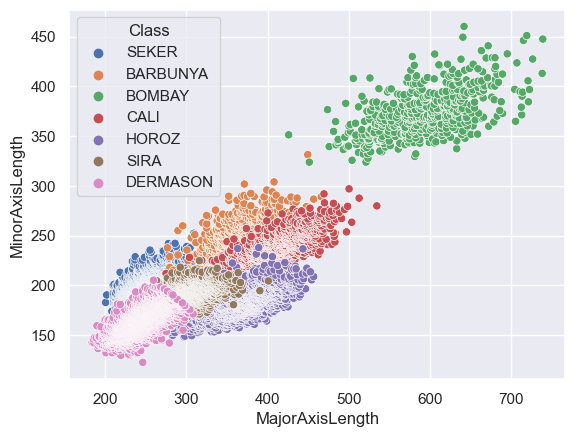

In [10]:
sns.scatterplot(data=df, x='MajorAxisLength', y='MinorAxisLength', hue='Class');

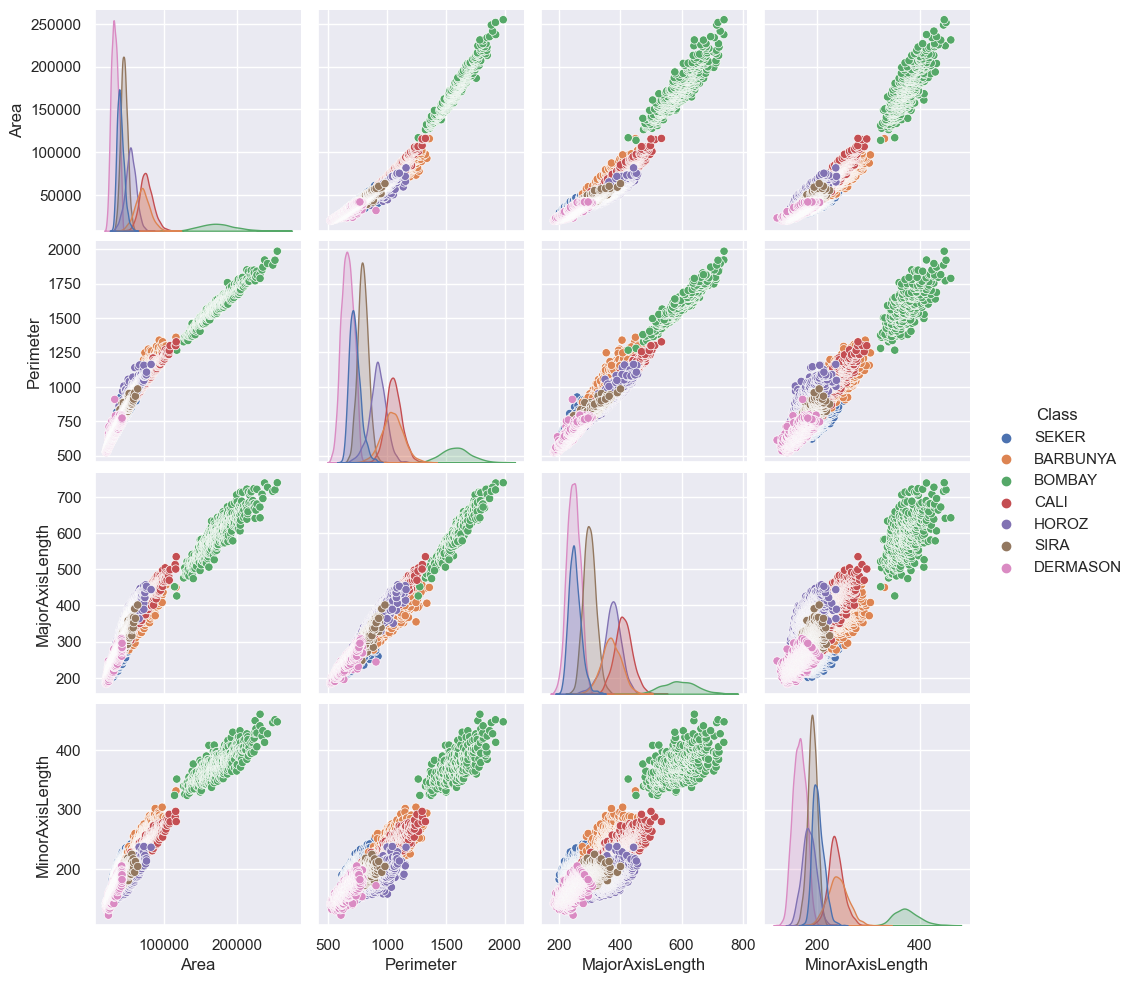

In [15]:
sns.pairplot(df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Class']], hue='Class');

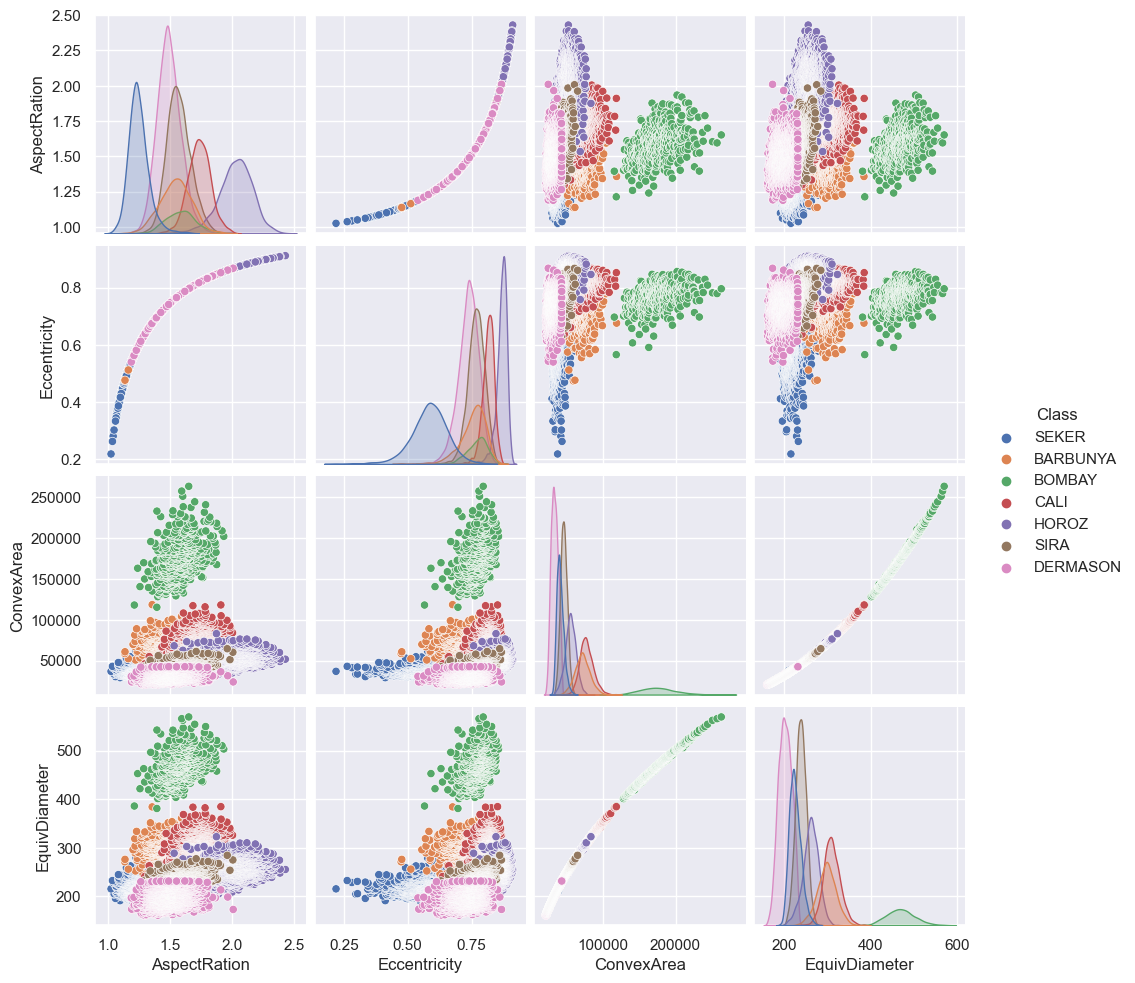

In [16]:
sns.pairplot(df[['AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Class']], hue='Class');

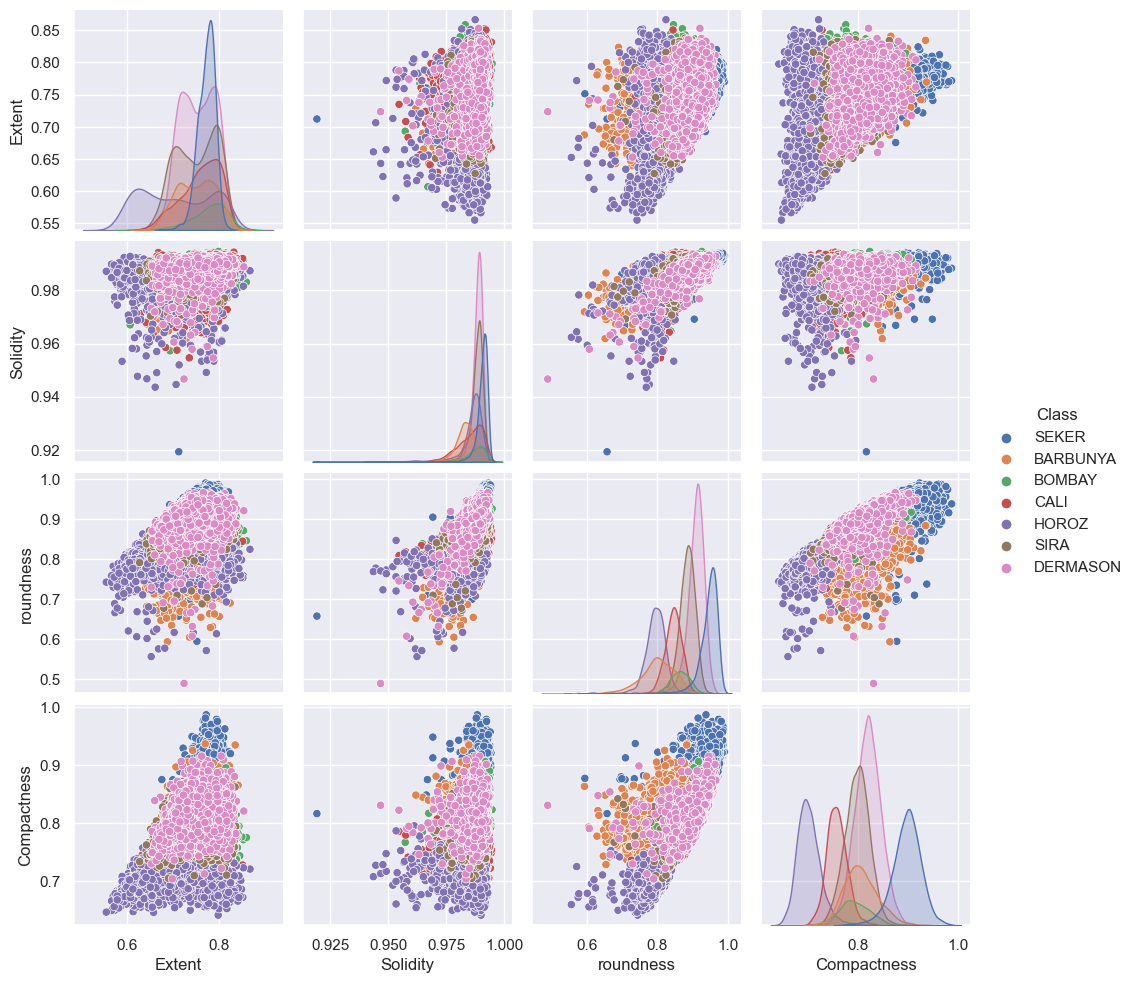

In [17]:
sns.pairplot(df[['Extent', 'Solidity', 'roundness', 'Compactness', 'Class']], hue='Class');

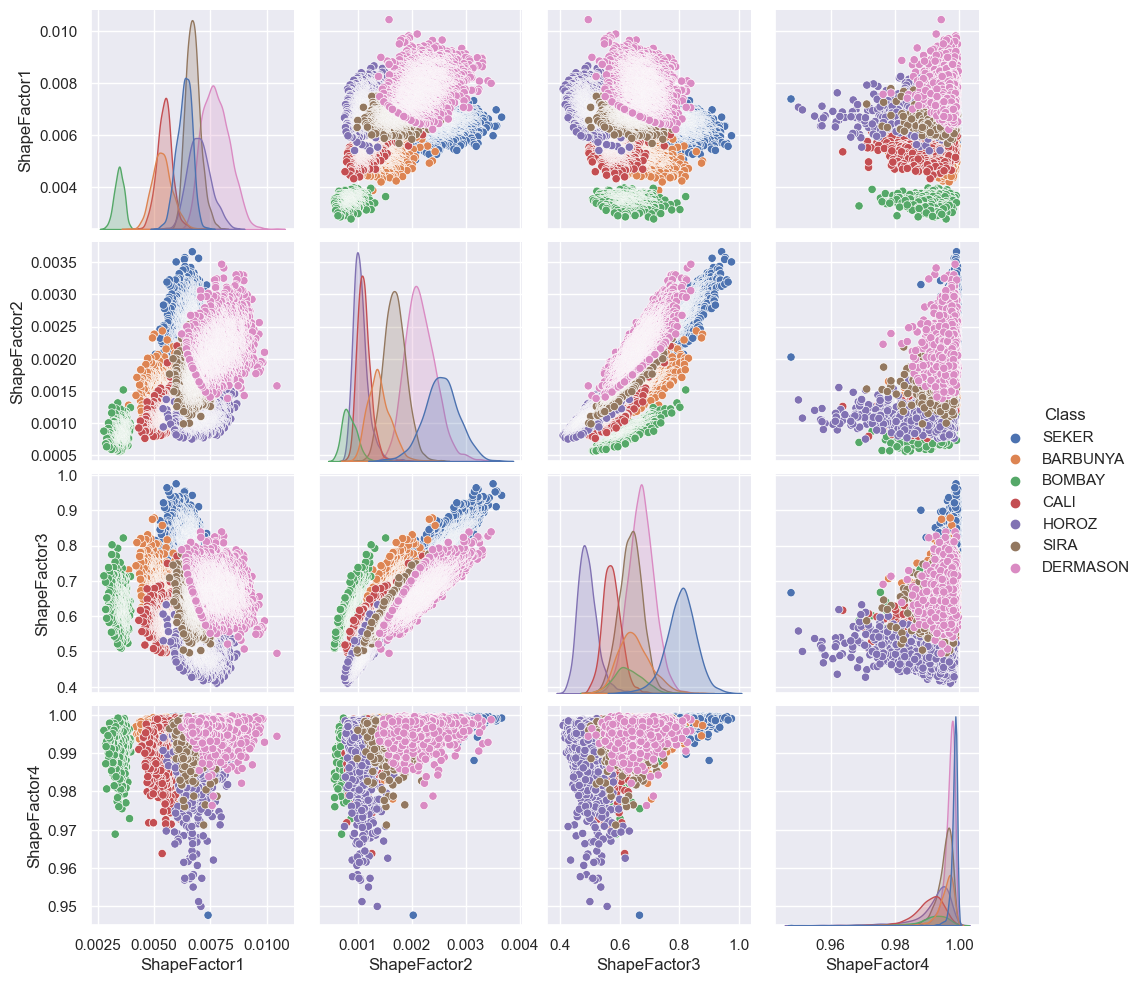

In [18]:
sns.pairplot(df[['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']], hue='Class');

By seeing these above charts, SVC may give better prediction for this dataset

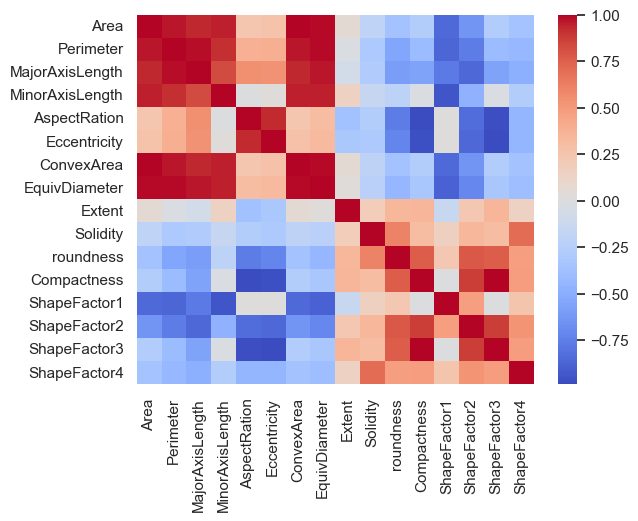

In [9]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm');

## Converting `Class` to numeric

In [4]:
df.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [5]:
df.Class = df.Class.map({'SEKER':0, 'BARBUNYA':1, 'BOMBAY':2, 'CALI':3, 'HOROZ':4, 'SIRA':5, 'DERMASON':6})

## Machine Learning

In [9]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler().fit(df.iloc[:, :-1].values)
x = ss.transform(df.iloc[:, :-1].values)
y = df.iloc[:, -1].values

Test Train Split:

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2
)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10834, 16), (2709, 16), (10834,), (2709,))

## LinearRegression:

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(x_train, y_train)
pred = LinearRegression_model.predict(x_test)
LinearRegression_score = LinearRegression_model.score(x_test, y_test)
LinearRegression_score

0.7831713989367792

## LogisticRegression:

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(x_train, y_train)
pred = LogisticRegression_model.predict(x_test)
LogisticRegression_score = LogisticRegression_model.score(x_test, y_test)
LogisticRegression_score

/home/adhiban/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9228497600590624

## DecisionTreeClassifier:

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
DecisionTreeClassifier_model = DecisionTreeClassifier()
DecisionTreeClassifier_model.fit(x_train, y_train)
pred = DecisionTreeClassifier_model.predict(x_test)
DecisionTreeClassifier_score = DecisionTreeClassifier_model.score(x_test, y_test)
DecisionTreeClassifier_score

0.8863049095607235

## KNeighborsRegressor:

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
KNeighborsRegressor_model = KNeighborsRegressor(n_neighbors=7)
KNeighborsRegressor_model.fit(x_train, y_train)
pred = KNeighborsRegressor_model.predict(x_test)
KNeighborsRegressor_score = KNeighborsRegressor_model.score(x_test, y_test)
KNeighborsRegressor_score

0.9128158531013113

## GaussianNB:

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(x_train, y_train)
pred = GaussianNB_model.predict(x_test)
GaussianNB_score = GaussianNB_model.score(x_test, y_test)
GaussianNB_score

0.8981173864894795

## SVC:

In [24]:
from sklearn.svm import SVC

In [25]:
SVC_model = SVC()
SVC_model.fit(x_train, y_train)
pred = SVC_model.predict(x_test)
SVC_score = SVC_model.score(x_test, y_test)
SVC_score

0.9317091177556294

## Best Score:

In [26]:
pd.Series({
    'LinearRegression_score':LinearRegression_score,
    'LogisticRegression_score':LogisticRegression_score,
    'DecisionTreeClassifier_score':DecisionTreeClassifier_score,
    'KNeighborsRegressor_score':KNeighborsRegressor_score,
    'GaussianNB_score':GaussianNB_score,
    'SVC_score':SVC_score
}).sort_values(ascending=False)

SVC_score                       0.931709
LogisticRegression_score        0.922850
KNeighborsRegressor_score       0.912816
GaussianNB_score                0.898117
DecisionTreeClassifier_score    0.886305
LinearRegression_score          0.783171
dtype: float64